In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\נעמיה\OneDrive - Ariel University\Documents\Data sciente\finall project\cardio_train.csv',sep=";")


#### There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.<br><br>
 #### Features:<br>
- Age | Objective Feature | age | int (days)<br>
- Height | Objective Feature | height | int (cm) |<br>
- Weight | Objective Feature | weight | float (kg) |<br>
- Gender | Objective Feature | gender | categorical code |<br>
- Systolic blood pressure | Examination Feature | ap_hi | int |<br>
- Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
- Smoking | Subjective Feature | smoke | binary |<br>
- Alcohol intake | Subjective Feature | alco | binary |<br>
- Physical activity | Subjective Feature | active | binary |<br>
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br><br>
All of the dataset values were collected at the moment of medical examination.<br></font></span></left>

In [3]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data=data.drop(columns='id')

In [6]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='height', ylabel='weight'>

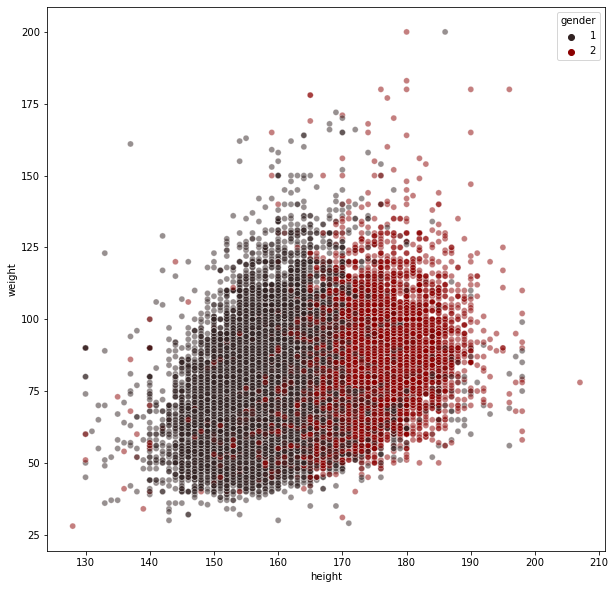

In [32]:
#sns.displot(data=data, x="height",col='gender' ,kde=True,multiple="stack")
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data=data, x="height", y="weight",hue='gender',palette="dark:darkred", alpha=0.5)


In [31]:
data=data.query('height > 125 & height <220 & weight>25')

In [8]:
data['rate']=data['cholesterol']+data['gluc']+data['smoke']+data['alco']
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,rate
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,4
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,3
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,4
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,5
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,3


<AxesSubplot:xlabel='cardio', ylabel='count'>

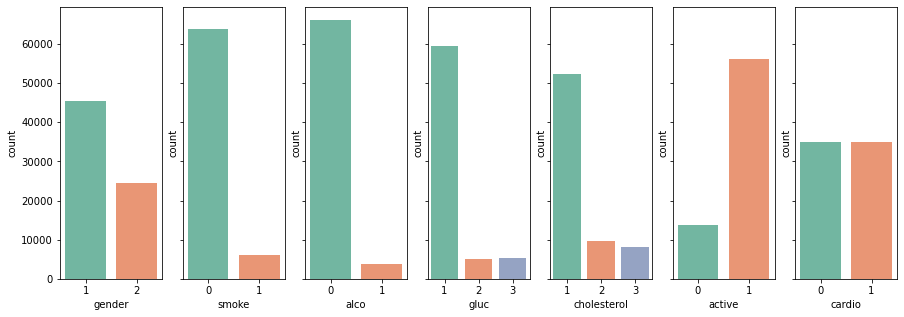

In [13]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=data,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=data,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=data,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=data,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=data,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=data,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=data,ax=axes[6],palette="Set2")

In [14]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.00000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000,69908.000000
mean,19469.397208,1.349531,164.438519,74.195367,128.825900,96.64007,1.367025,1.226555,0.088159,0.053799,0.803828,0.499728
std,2467.076486,0.476825,7.860131,14.361980,154.110156,188.56399,0.680335,0.572367,0.283528,0.225623,0.397103,0.500004
min,10798.000000,1.000000,128.000000,10.000000,-150.000000,-70.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.00000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,200.000000,16020.000000,11000.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='cardio', ylabel='count'>

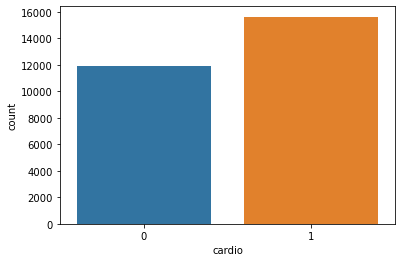

In [15]:
data_al=data.query('smoke  == 1 | alco  == 1| gluc  == 3 | cholesterol == 3 | active == 0')
sns.countplot(x='cardio',data=data_al)


<AxesSubplot:xlabel='cardio', ylabel='count'>

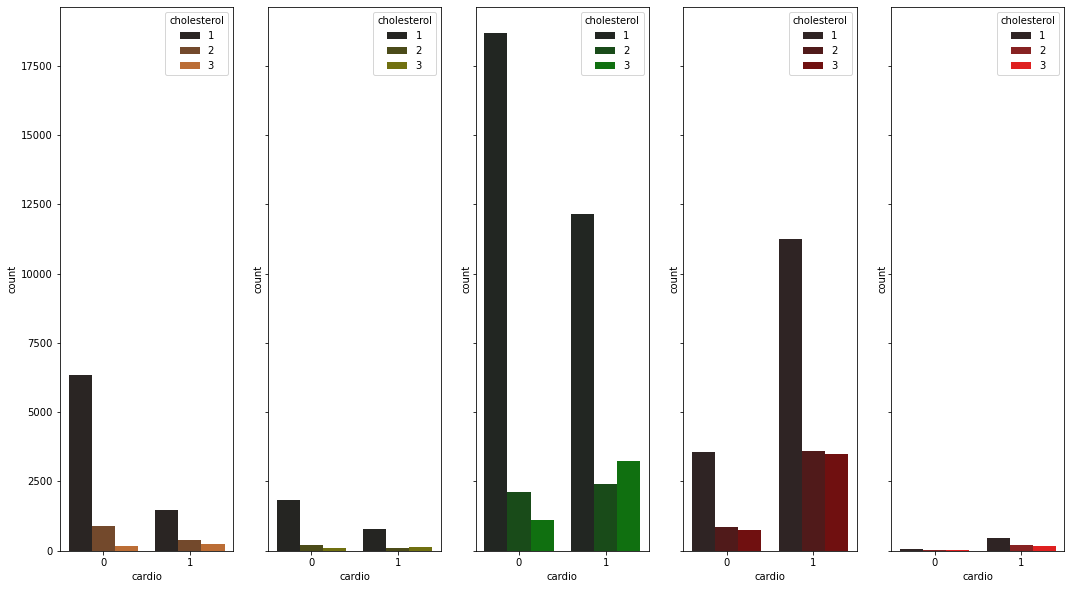

In [43]:

data=data.query('70 < ap_hi < 220 & 40 < ap_lo < 190 & ap_hi>ap_lo')
pre_1=data.query('ap_hi < 120 & ap_lo < 80')
pre_2=data.query('120 <= ap_hi < 130 & ap_lo < 80')
pre_3=data.query('130 <= ap_hi < 140 | 80 <= ap_lo < 90')
pre_4=data.query('ap_hi >= 140 |  ap_lo >= 90')
pre_5=data.query('ap_hi >= 180 |  ap_lo >= 120')
#sns.countplot(data=pre_5, x='alco',hue='cardio',palette="dark:darkred")
f, axes = plt.subplots(1, 5, figsize=(18, 10), sharex=False,sharey=True)

sns.countplot(data=pre_1, x='cardio',palette="dark:chocolate",ax=axes[0],hue='cholesterol')
sns.countplot(data=pre_2, x='cardio',palette="dark:olive",ax=axes[1],hue='cholesterol')
sns.countplot(data=pre_3, x='cardio',palette="dark:green",ax=axes[2],hue='cholesterol')
sns.countplot(data=pre_4, x='cardio',palette="dark:maroon",ax=axes[3],hue='cholesterol')
sns.countplot(data=pre_5, x='cardio',palette="dark:red",ax=axes[4],hue='cholesterol')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68534 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68534 non-null  int64  
 1   gender       68534 non-null  int64  
 2   height       68534 non-null  int64  
 3   weight       68534 non-null  float64
 4   ap_hi        68534 non-null  int64  
 5   ap_lo        68534 non-null  int64  
 6   cholesterol  68534 non-null  int64  
 7   gluc         68534 non-null  int64  
 8   smoke        68534 non-null  int64  
 9   alco         68534 non-null  int64  
 10  active       68534 non-null  int64  
 11  cardio       68534 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


<AxesSubplot:>

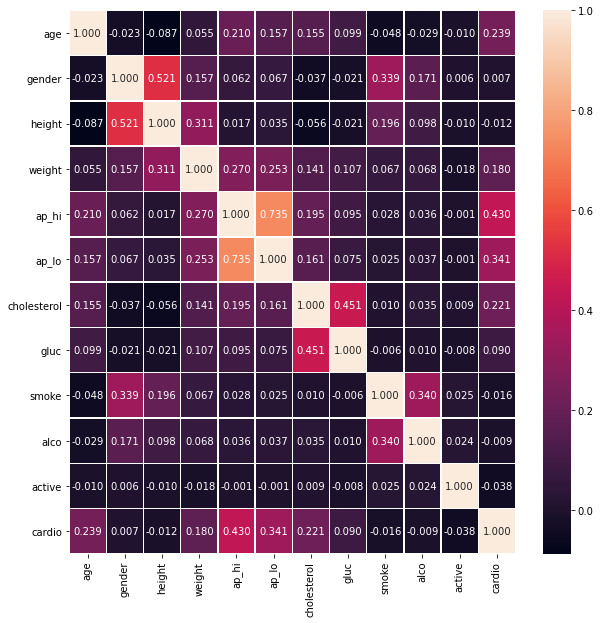

In [38]:
corr = data.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [ ]:
for index,row in data.iterrows():
    if (row['ap_hi']<120 ):
        (row)

In [54]:
df=[pre_1,pre_2,pre_3,pre_4,pre_5]
for i in df:
    i['rate']=1

<ipython-input-54-db8e3fb2418d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['rate']=1


In [39]:
data["bmi"] = pd.to_numeric((data["weight"]/ (data["height"]/100)**2).round(),downcast='integer')

data['bmi']

<ipython-input-39-d86b5f6fc3fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bmi"] = pd.to_numeric((data["weight"]/ (data["height"]/100)**2).round(),downcast='integer')


0        22
1        35
2        24
3        29
4        23
         ..
69995    27
69996    50
69997    31
69998    27
69999    25
Name: bmi, Length: 68534, dtype: int8

<AxesSubplot:>

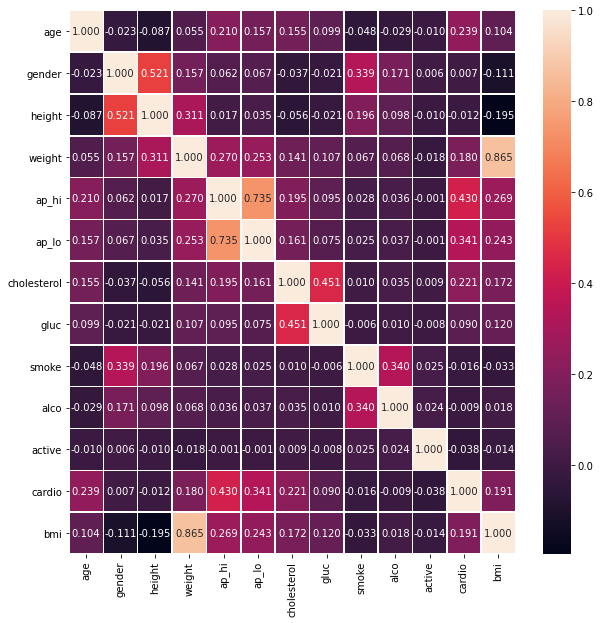

In [40]:
corr = data.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

<AxesSubplot:xlabel='years', ylabel='count'>

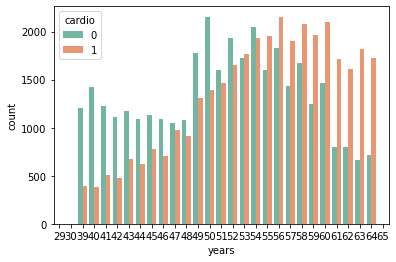

In [11]:
data['years'] = (data['age'] / 365).round(1).astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2")

<AxesSubplot:xlabel='bmi', ylabel='rel'>

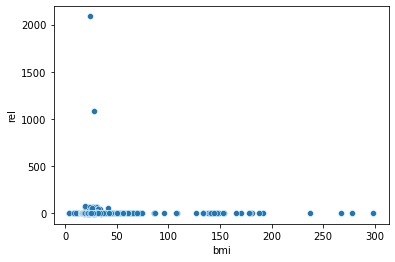

In [12]:
data['rel'] =data['ap_lo']/data['ap_hi']
sns.scatterplot(x='bmi',y='rel',data=data)

In [38]:
df=data[data['bmi']<60]
df=df[df['bmi']>10]

out_filter = ((df["ap_hi"]<200) & (df["ap_lo"]<200) & (df["ap_hi"]>0) & (df["ap_lo"]>0))
df = df[out_filter]
# out_filter = (())
# df = df[~out_filter]

df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [80]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']

In [81]:
from sklearn import neighbors
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [82]:
dum=DummyClassifier(strategy='prior')
dum.fit(X_train,y_train)
dum_pre=dum.predict(X_test)
dum.score(X_test,y_test)

0.5062518173887758

Text(0, 0.5, 'Testing Accuracy')

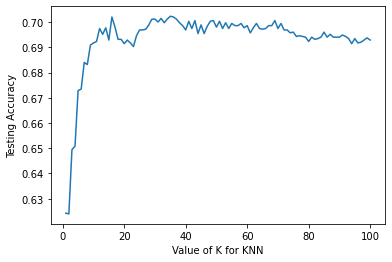

In [39]:
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [83]:
knn = neighbors.KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
knn_pre=knn.predict(X_test)
knn.score(X_test,y_test)

0.7028205873800524

In [84]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
y_train_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_train, y_train_pred)

Text(24.0, 0.5, 'Actually')

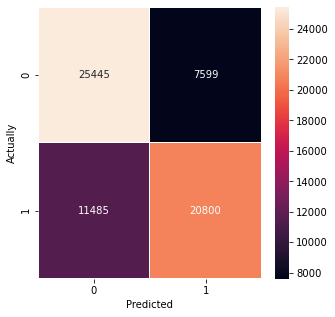

In [86]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

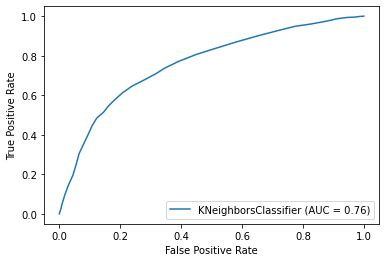

In [60]:
metrics.plot_roc_curve(knn, X_test, y_test) 

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73      1741
           1       0.73      0.63      0.68      1698

    accuracy                           0.70      3439
   macro avg       0.71      0.70      0.70      3439
weighted avg       0.71      0.70      0.70      3439



In [132]:
from sklearn.metrics import f1_score

knn.predict_proba(X_test)

array([[0.96, 0.04],
       [0.88, 0.12],
       [0.68, 0.32],
       ...,
       [0.16, 0.84],
       [0.44, 0.56],
       [0.28, 0.72]])

In [64]:
df['gender']

id
0        2
1        1
2        1
3        2
4        1
        ..
99993    2
99995    1
99996    2
99998    1
99999    1
Name: gender, Length: 69871, dtype: int64

Text(0, 0.5, 'Testing Accuracy')

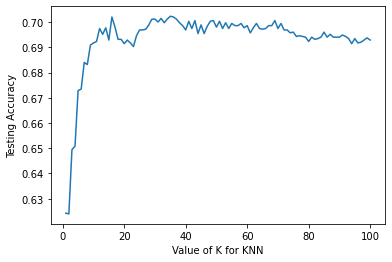

In [46]:
from sklearn import metrics
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)

In [90]:
scores

array([0.71238328, 0.7044237 , 0.70212766, 0.7157508 , 0.71544467,
       0.71054646, 0.70503597, 0.71008725, 0.70671973, 0.7072872 ])

<AxesSubplot:xlabel='ap_lo', ylabel='ap_hi'>

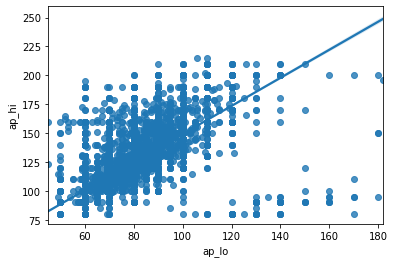

In [37]:
sns.regplot(x='ap_lo',
    y='ap_hi',
    data=data)